# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set in basedi

In [5]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu,alternative_pressure=True)

Note: redshifts have been re-sorted (earliest first)


In [6]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
prior_Gauss_rms=0.02
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,
                           min_kp_kms=min_kp_kms,ignore_emu_cov=ignore_emu_cov,
                           prior_Gauss_rms=prior_Gauss_rms,verbose=True)

likelihood setup with 7 free parameters
7 free parameters


In [7]:
for p in like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
T0_1 0.13626544653787526 0 1
T0_2 9.546039892898634 7 11
T0_3 -1.2041429220366868 -1.5 -0.5
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -1.3862943611198906 -2.995732273553991 -0.6931471805599453


In [12]:
Np=len(like.free_params)
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=2*Np+6)

use input likelihood
setup with 20 walkers
set 20 walkers with 7 dimensions
done setting up sampler


### Run burn-in chains

In [13]:
sampler.like.go_silent()

In [14]:
sampler.run_burn_in(nsteps=400+100*Np)

start burn-in, will do 1100 steps
0 [0.47190865 0.9138838  0.13481775 0.63655831 0.30190753 0.39217574
 0.70220217]
20 [0.45939297 0.89436849 0.12861283 0.6243817  0.30891203 0.38099013
 0.67946102]
40 [0.45135749 0.89504489 0.13031109 0.60953999 0.30200579 0.39862819
 0.67224843]
60 [0.44728425 0.88795233 0.13129281 0.6093014  0.29296244 0.39329226
 0.66847672]
80 [0.44728678 0.8865913  0.1319384  0.60619981 0.29650469 0.39555447
 0.6671614 ]
100 [0.44416449 0.88581693 0.13603628 0.6115031  0.2897162  0.39640497
 0.66578322]
120 [0.44129174 0.88312769 0.13141668 0.61113724 0.30031404 0.39695379
 0.66569342]
140 [0.43755563 0.88919094 0.13031961 0.61583671 0.29317256 0.3946632
 0.6656813 ]
160 [0.43604814 0.88998334 0.13230425 0.61338475 0.29784953 0.39614504
 0.66600131]
180 [0.43766072 0.88988109 0.12588299 0.61382861 0.29124057 0.4028157
 0.66570779]
200 [0.44187654 0.89107698 0.12772263 0.61103292 0.29332495 0.396389
 0.66594352]
220 [0.43868719 0.88655581 0.13320135 0.61295656 0.2

### Run main chains

In [15]:
sampler.run_chains(nsteps=1000+300*Np)

0 [0.43409285 0.89069279 0.13531177 0.61476657 0.30341357 0.39847911
 0.66613823]
20 [0.43516227 0.884365   0.13173492 0.61408069 0.29968897 0.40231642
 0.6659705 ]
40 [0.43644866 0.88207401 0.12511586 0.61381656 0.29680784 0.39898566
 0.66605698]
60 [0.44004016 0.88121886 0.13237072 0.61275163 0.29799948 0.39794087
 0.6653884 ]
80 [0.44216733 0.8813974  0.13147808 0.61091891 0.30149508 0.39532318
 0.66511799]
100 [0.44433173 0.88158582 0.13676606 0.61039944 0.30458191 0.39701688
 0.6637359 ]
120 [0.43935788 0.8823959  0.13328585 0.61180322 0.30173965 0.39507705
 0.66611241]
140 [0.44246968 0.87827633 0.13746826 0.60895496 0.3051345  0.39384051
 0.66526902]
160 [0.43826226 0.88172846 0.1388722  0.61448395 0.30360432 0.39706253
 0.66470227]
180 [0.43639794 0.88548164 0.13328394 0.6176981  0.29772362 0.39872501
 0.66446229]
200 [0.43805799 0.88606449 0.13302023 0.61574556 0.29992345 0.39512186
 0.66559292]
220 [0.43728126 0.89351582 0.13500009 0.61463318 0.29540147 0.39305179
 0.66666372

In [16]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.484


### Plot results in cube units (0 < x < 1)

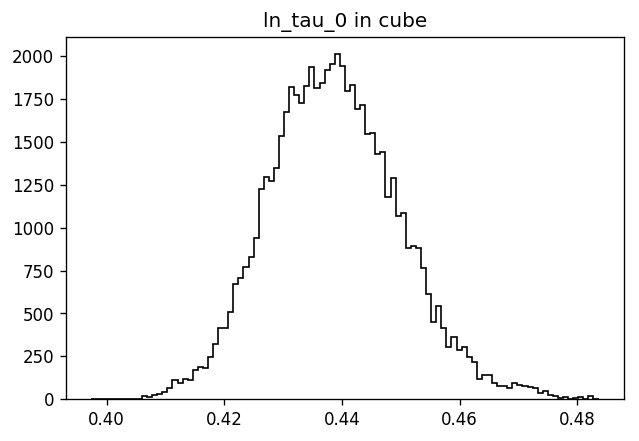

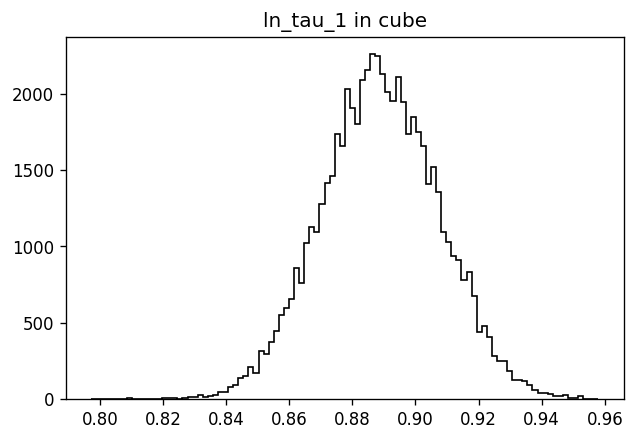

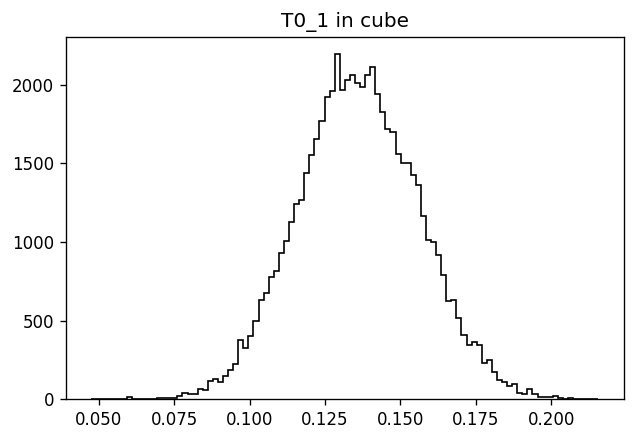

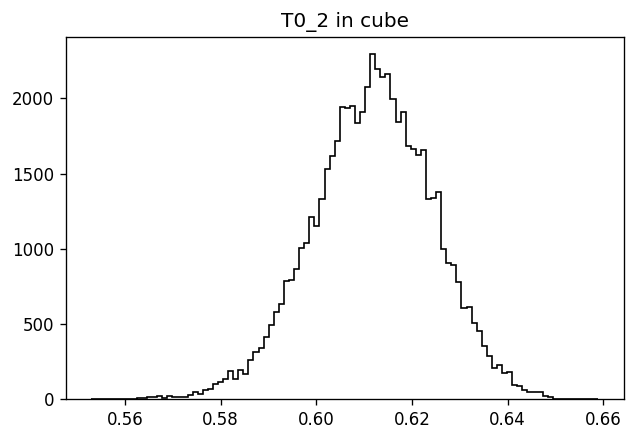

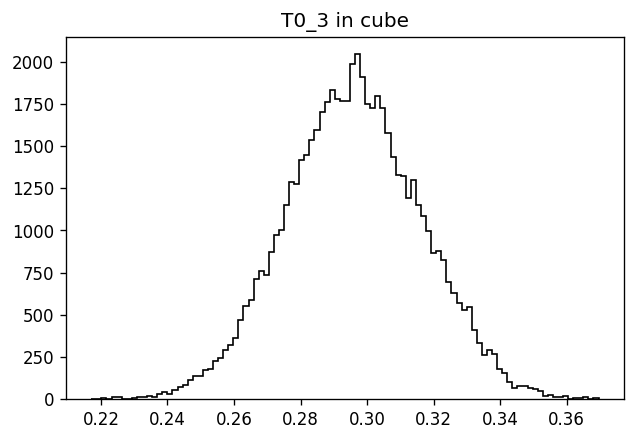

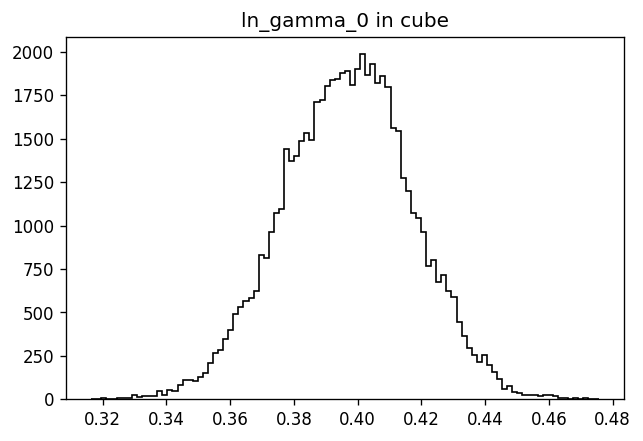

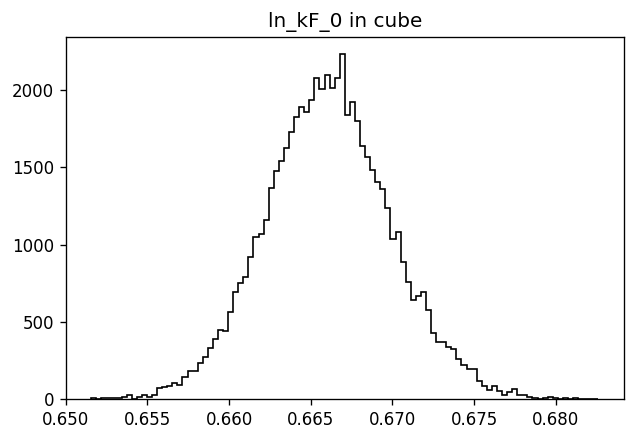

In [17]:
sampler.plot_histograms(cube=True)

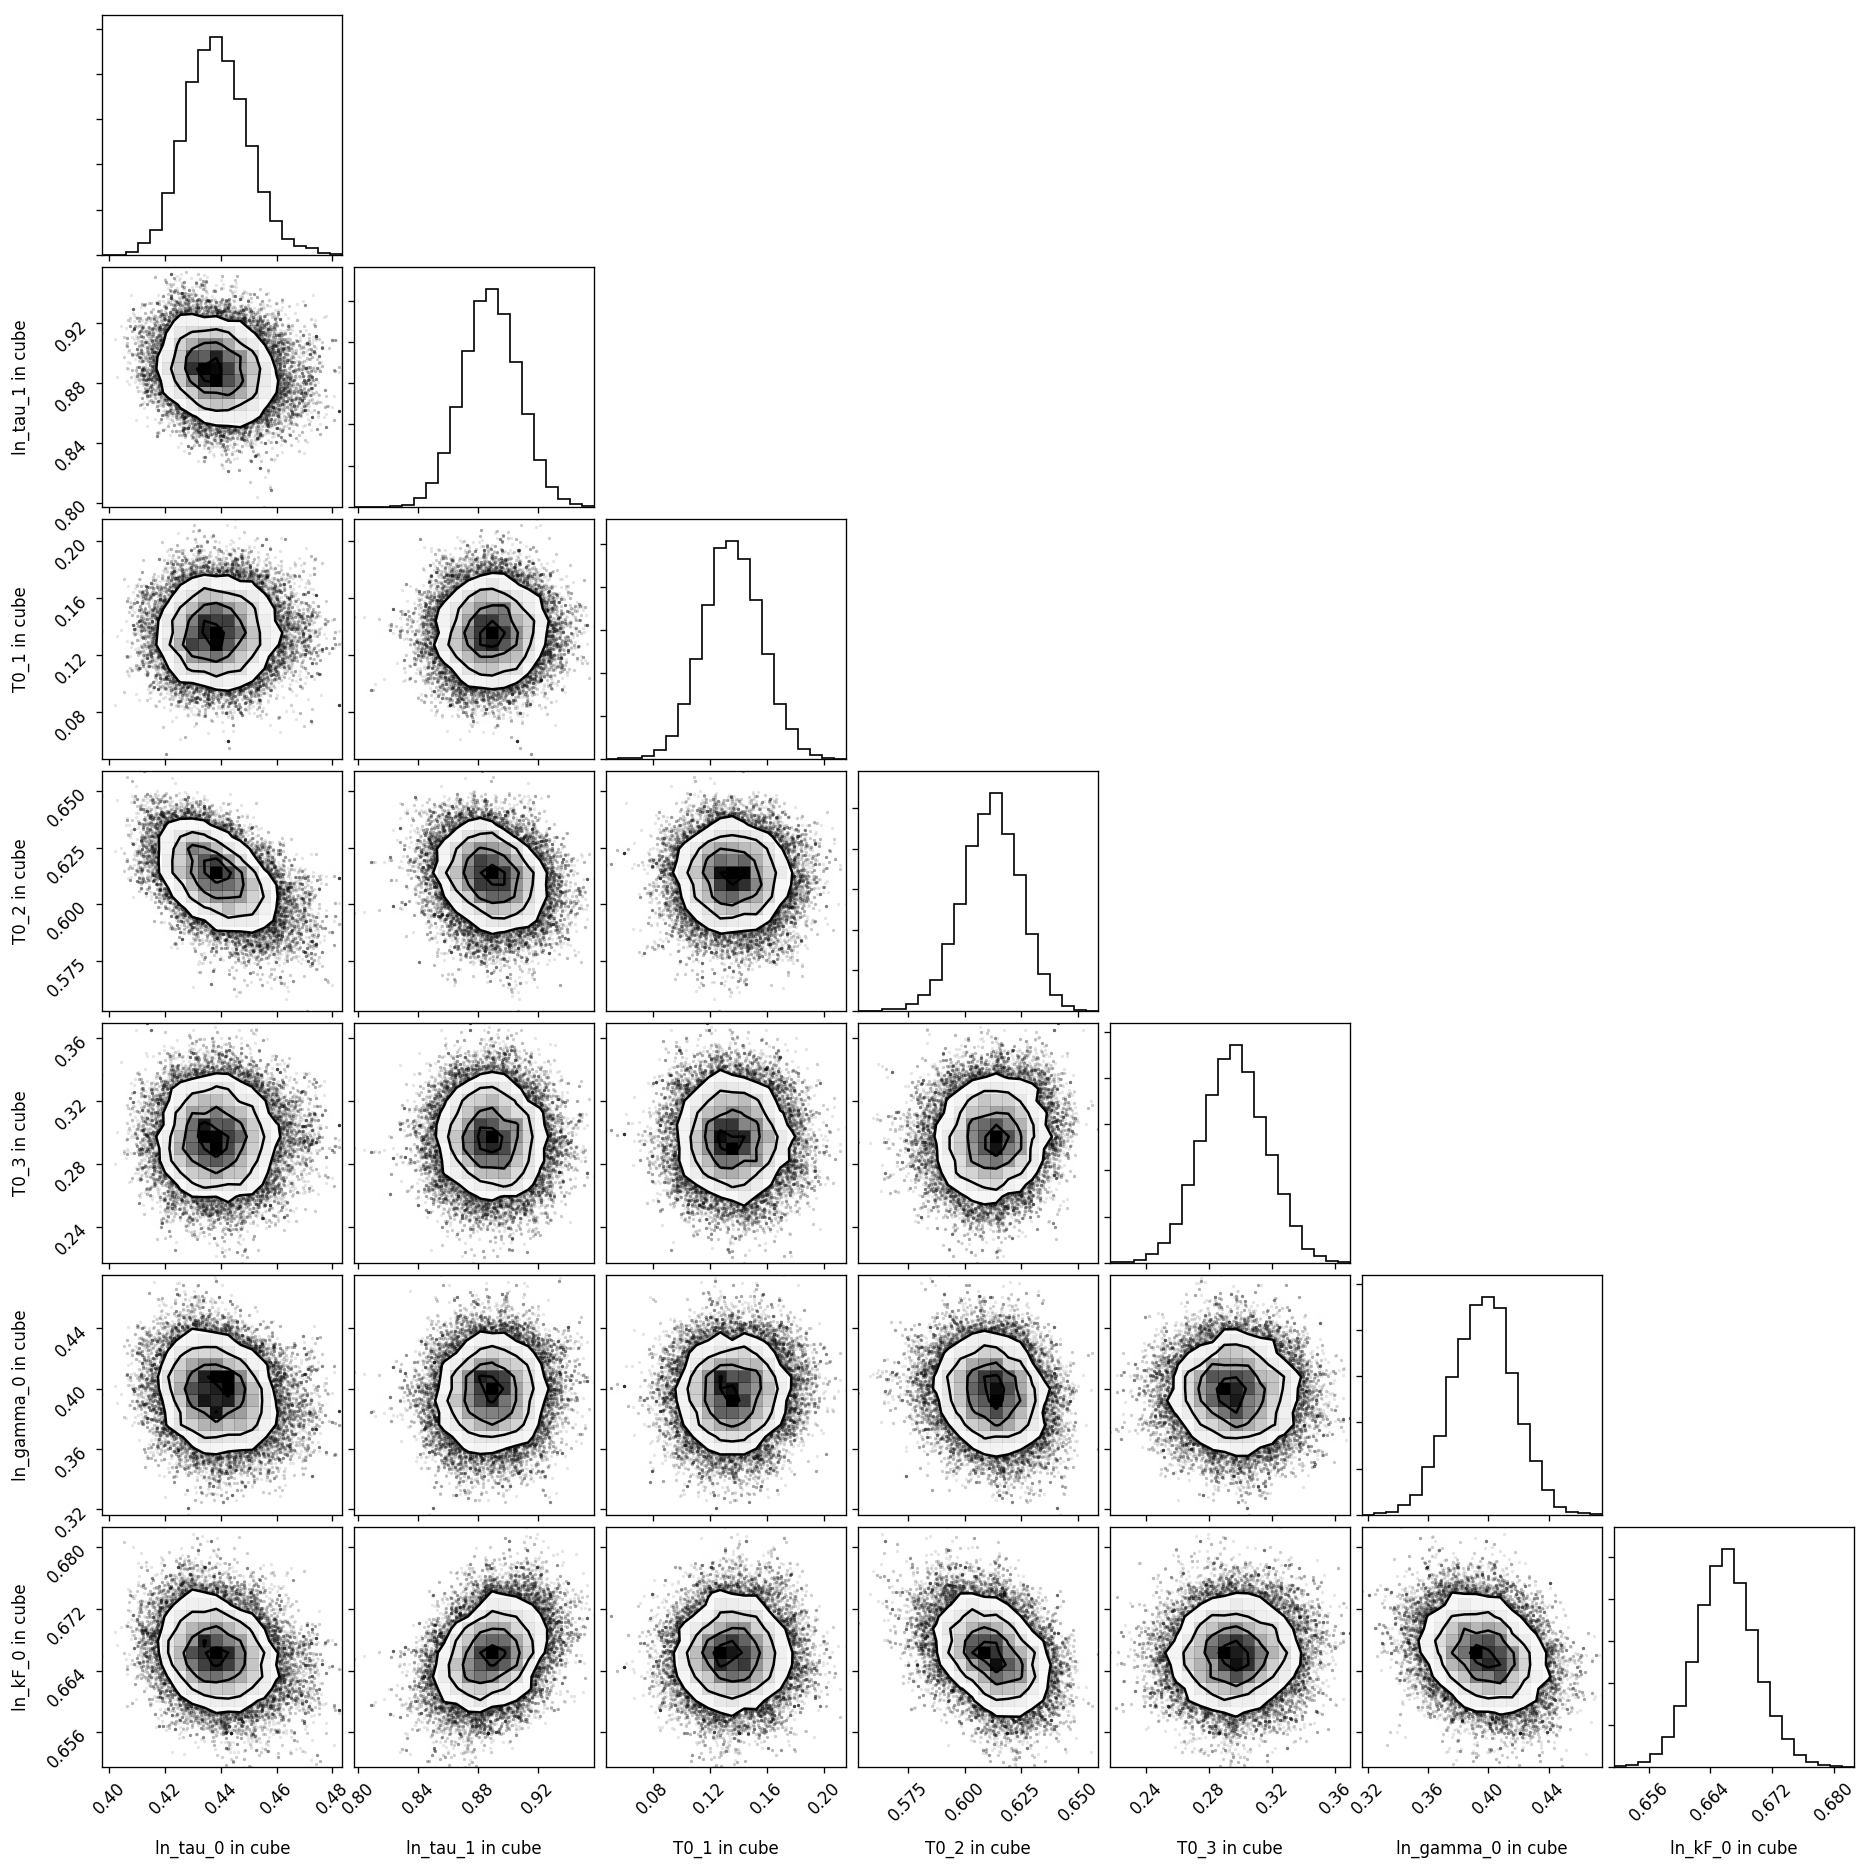

In [18]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

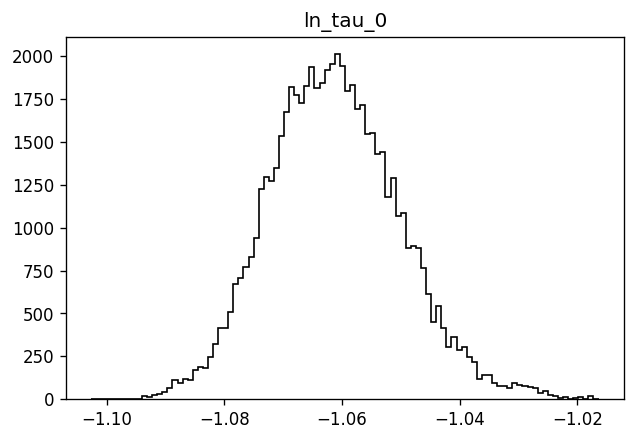

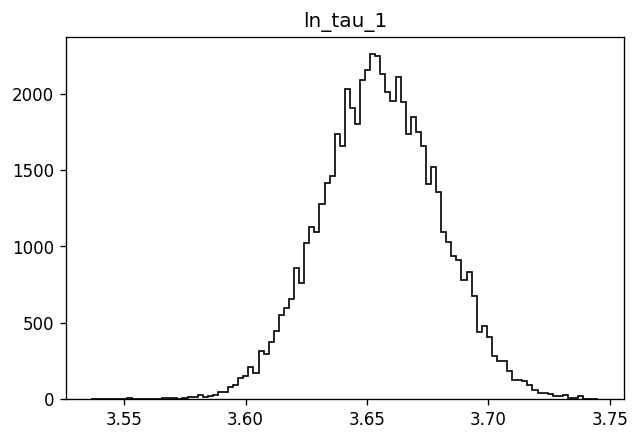

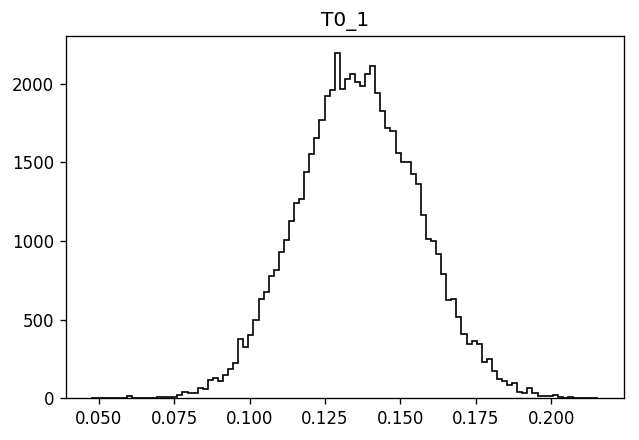

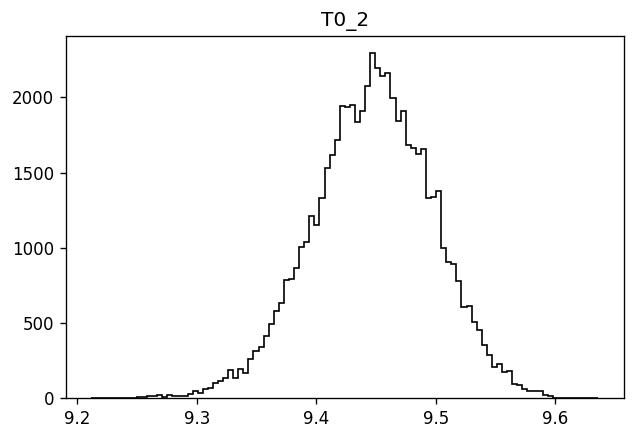

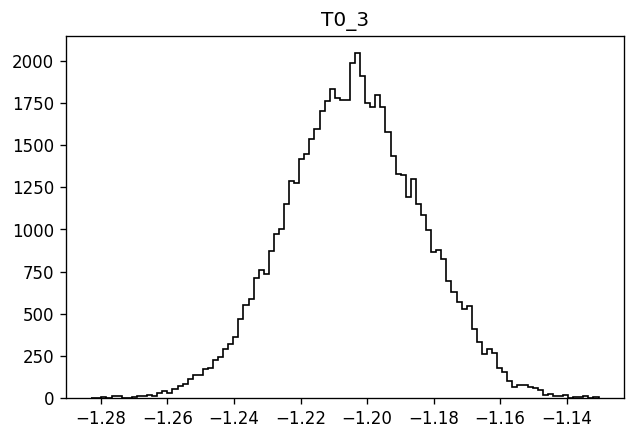

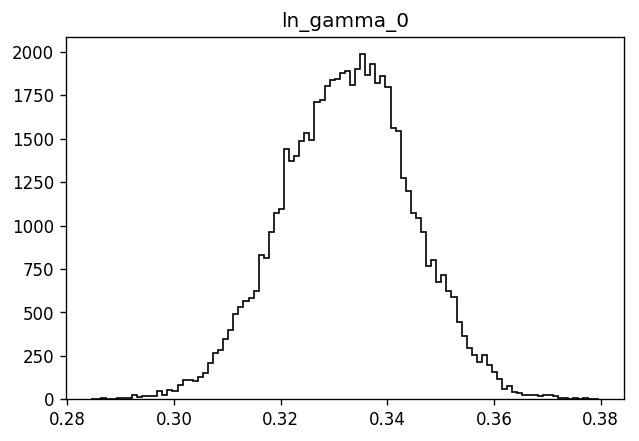

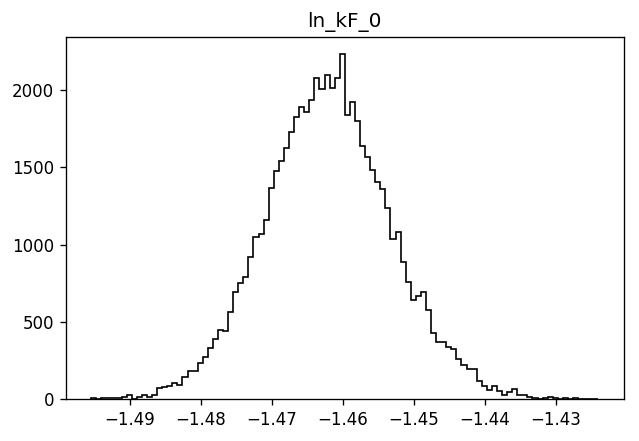

In [19]:
sampler.plot_histograms(cube=False)

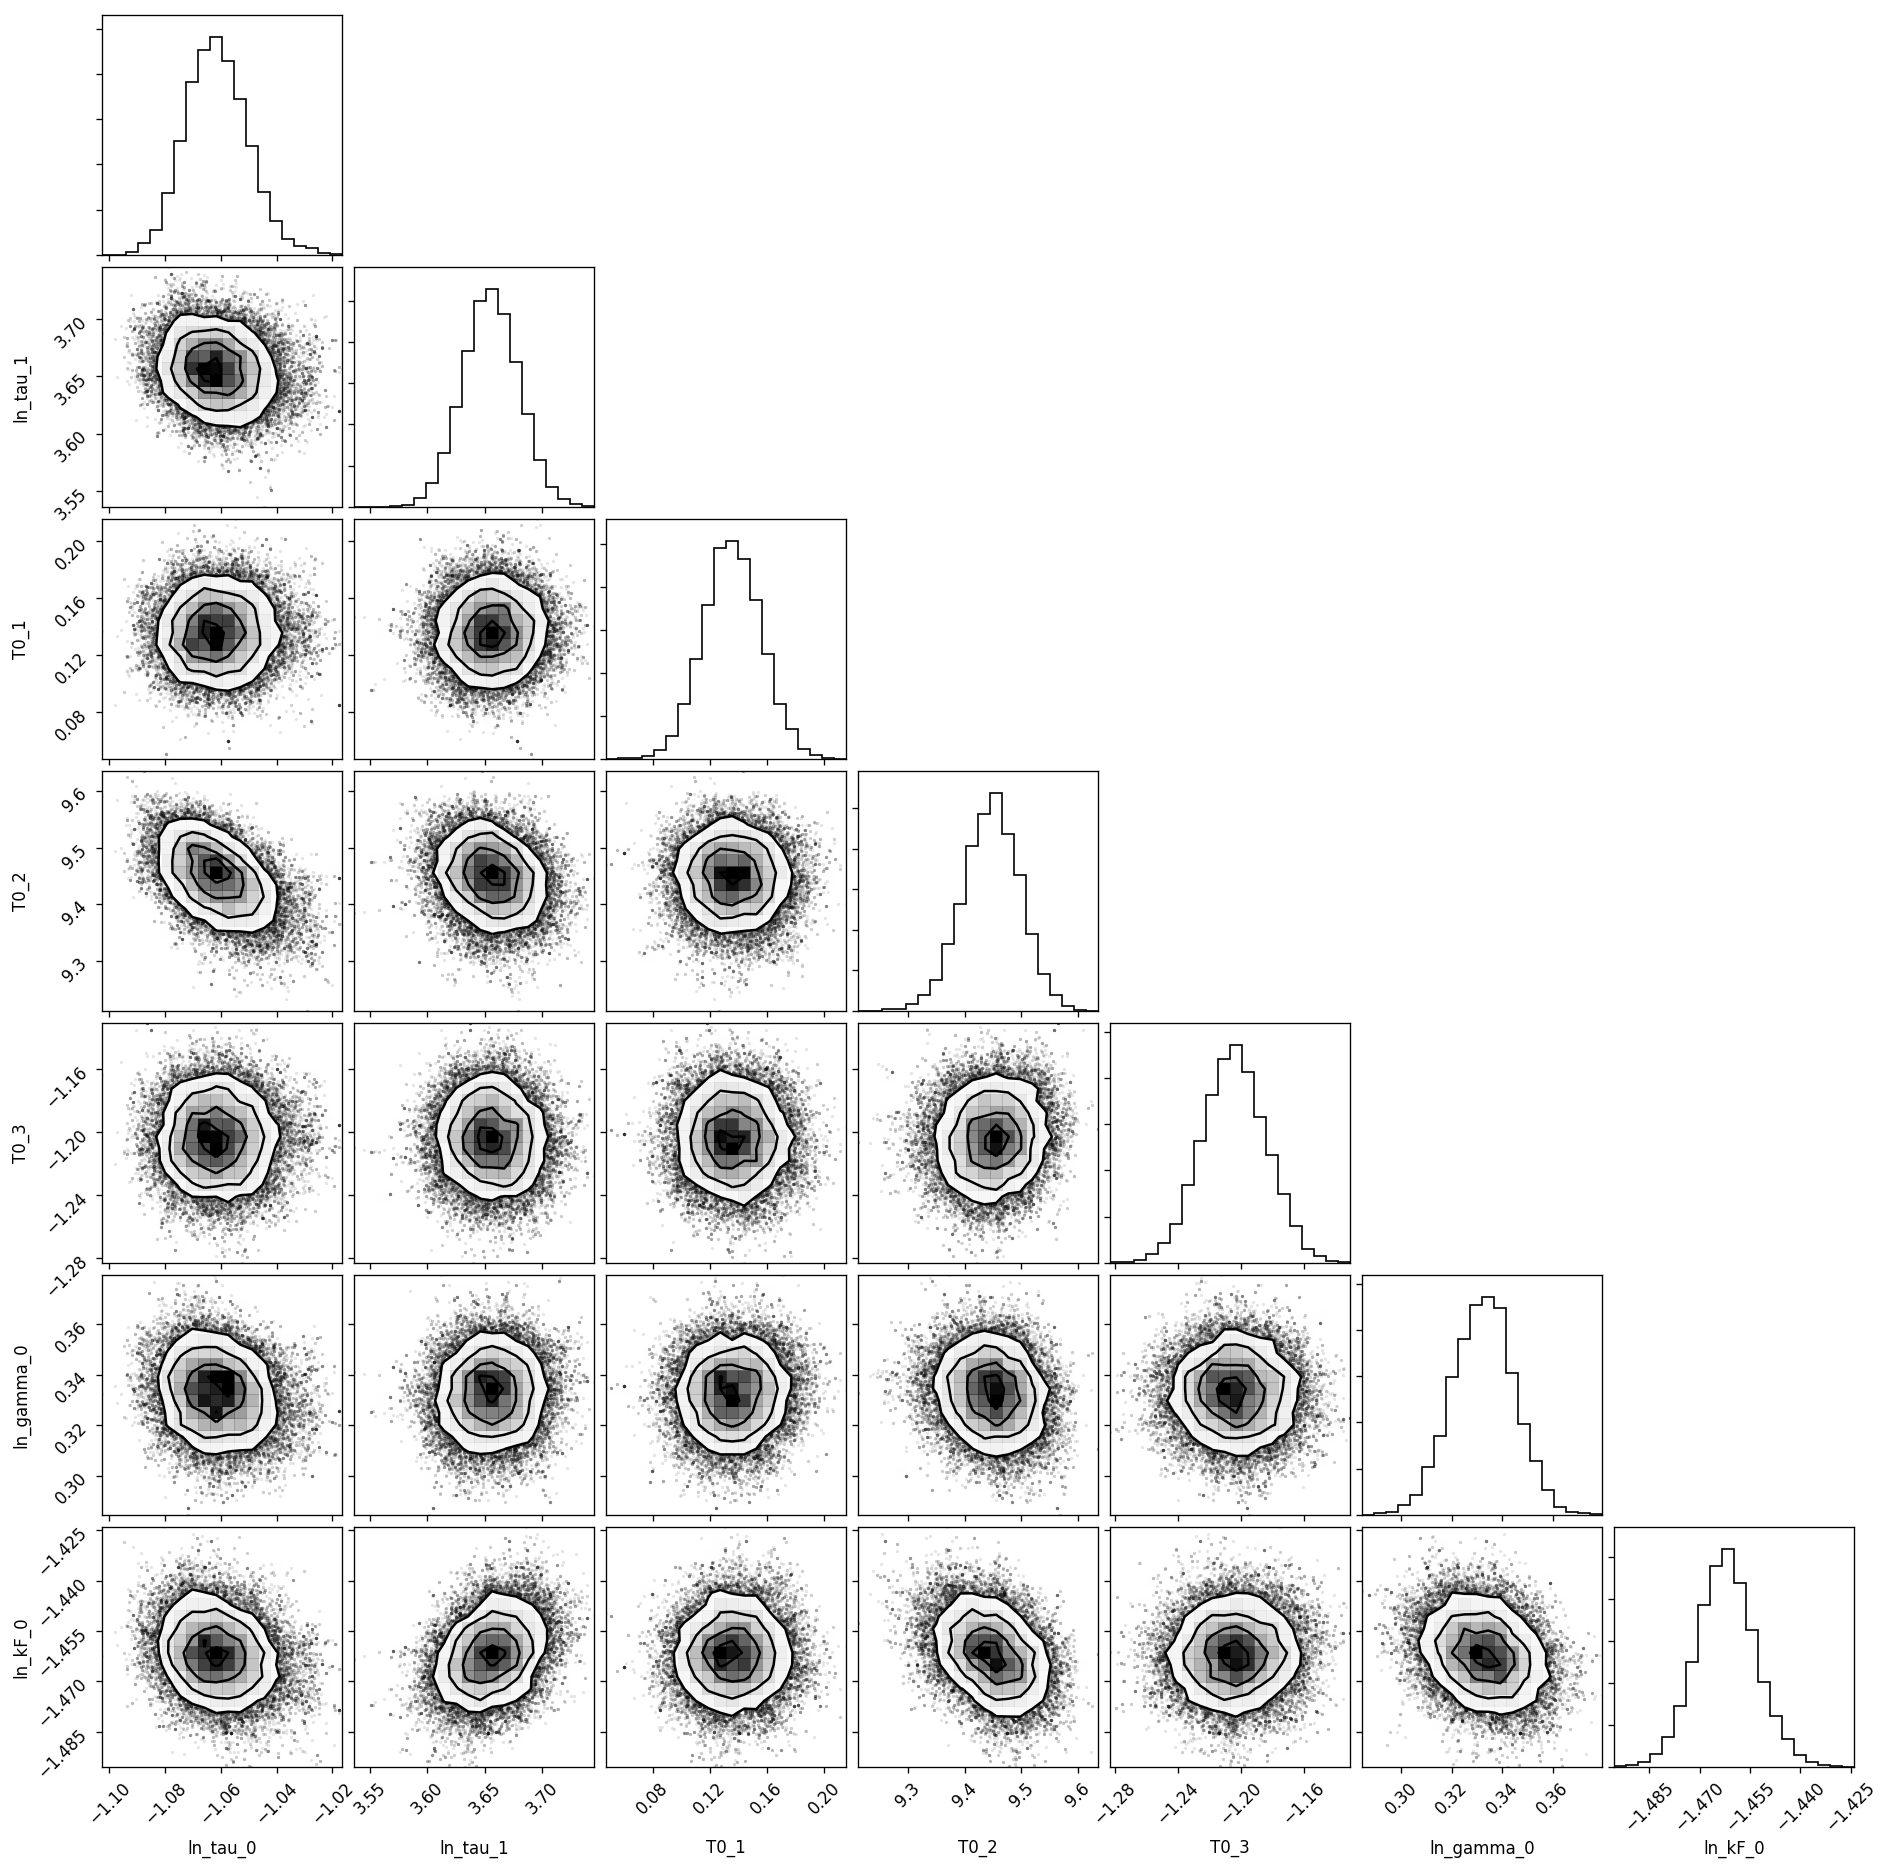

In [20]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [21]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

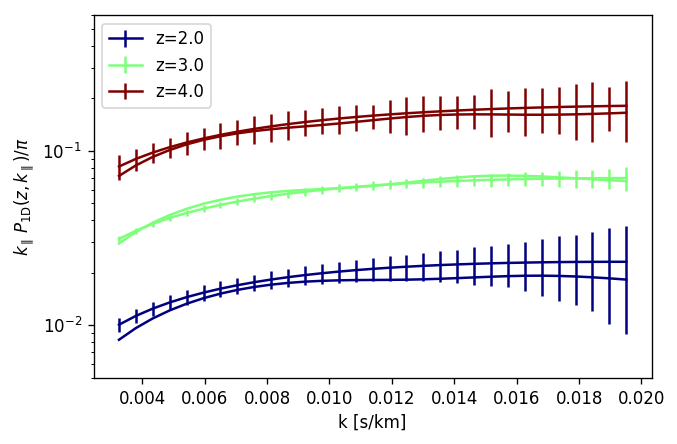

In [22]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

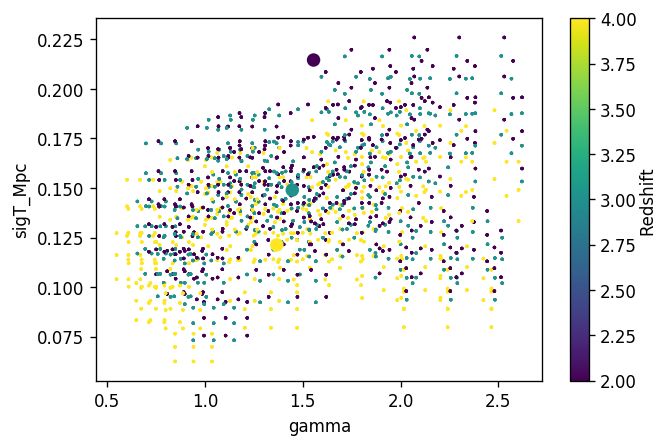

In [23]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

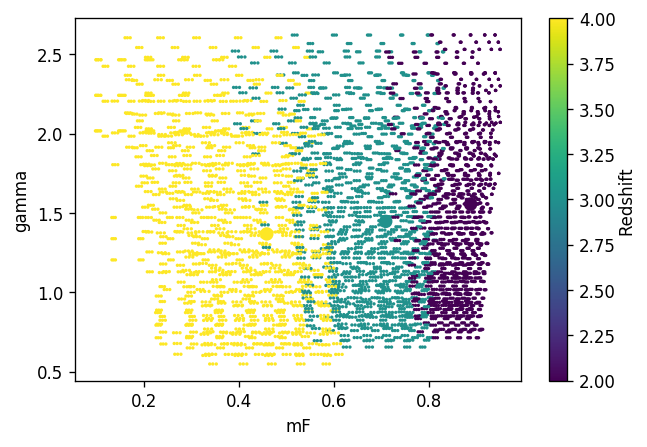

In [24]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

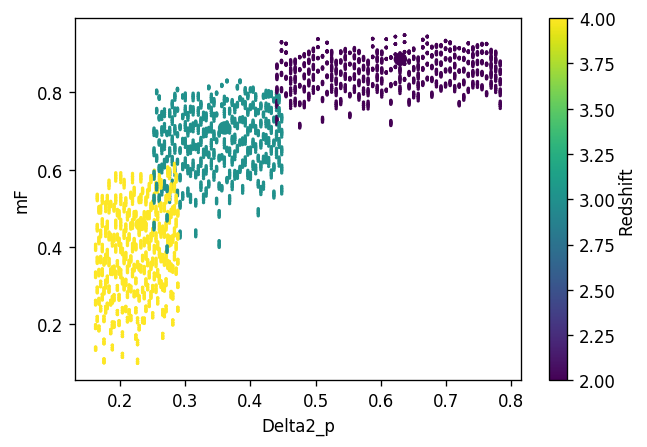

In [25]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

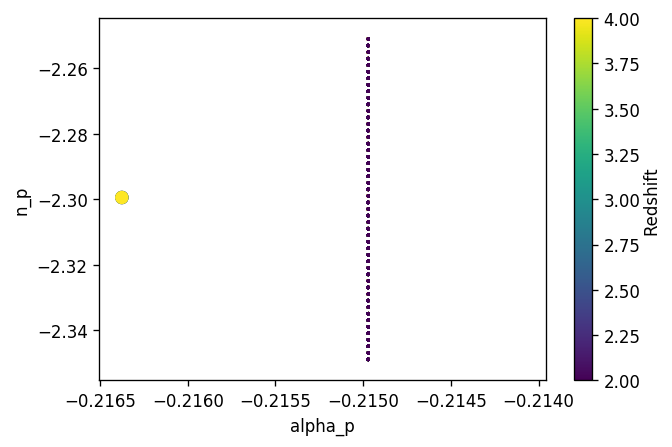

In [26]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

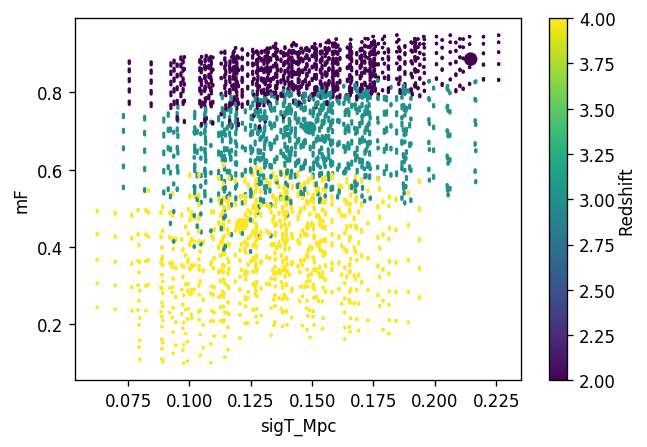

In [27]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

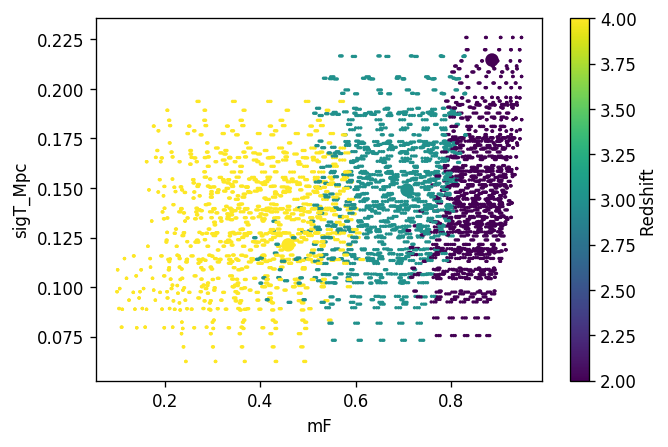

In [28]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

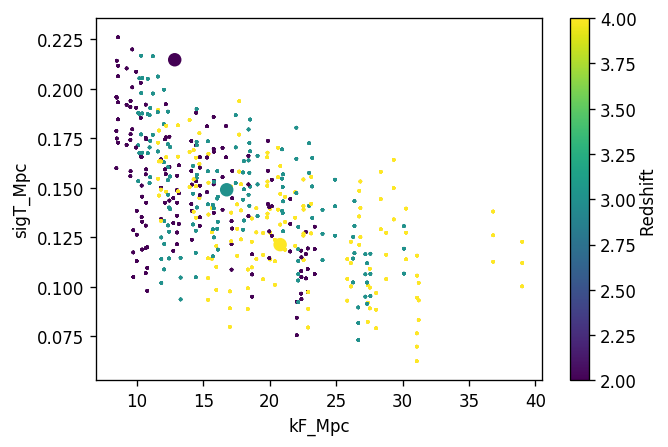

In [29]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

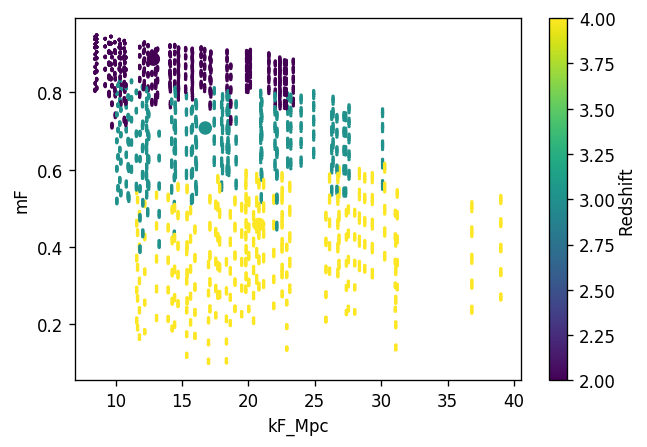

In [30]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [31]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [32]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


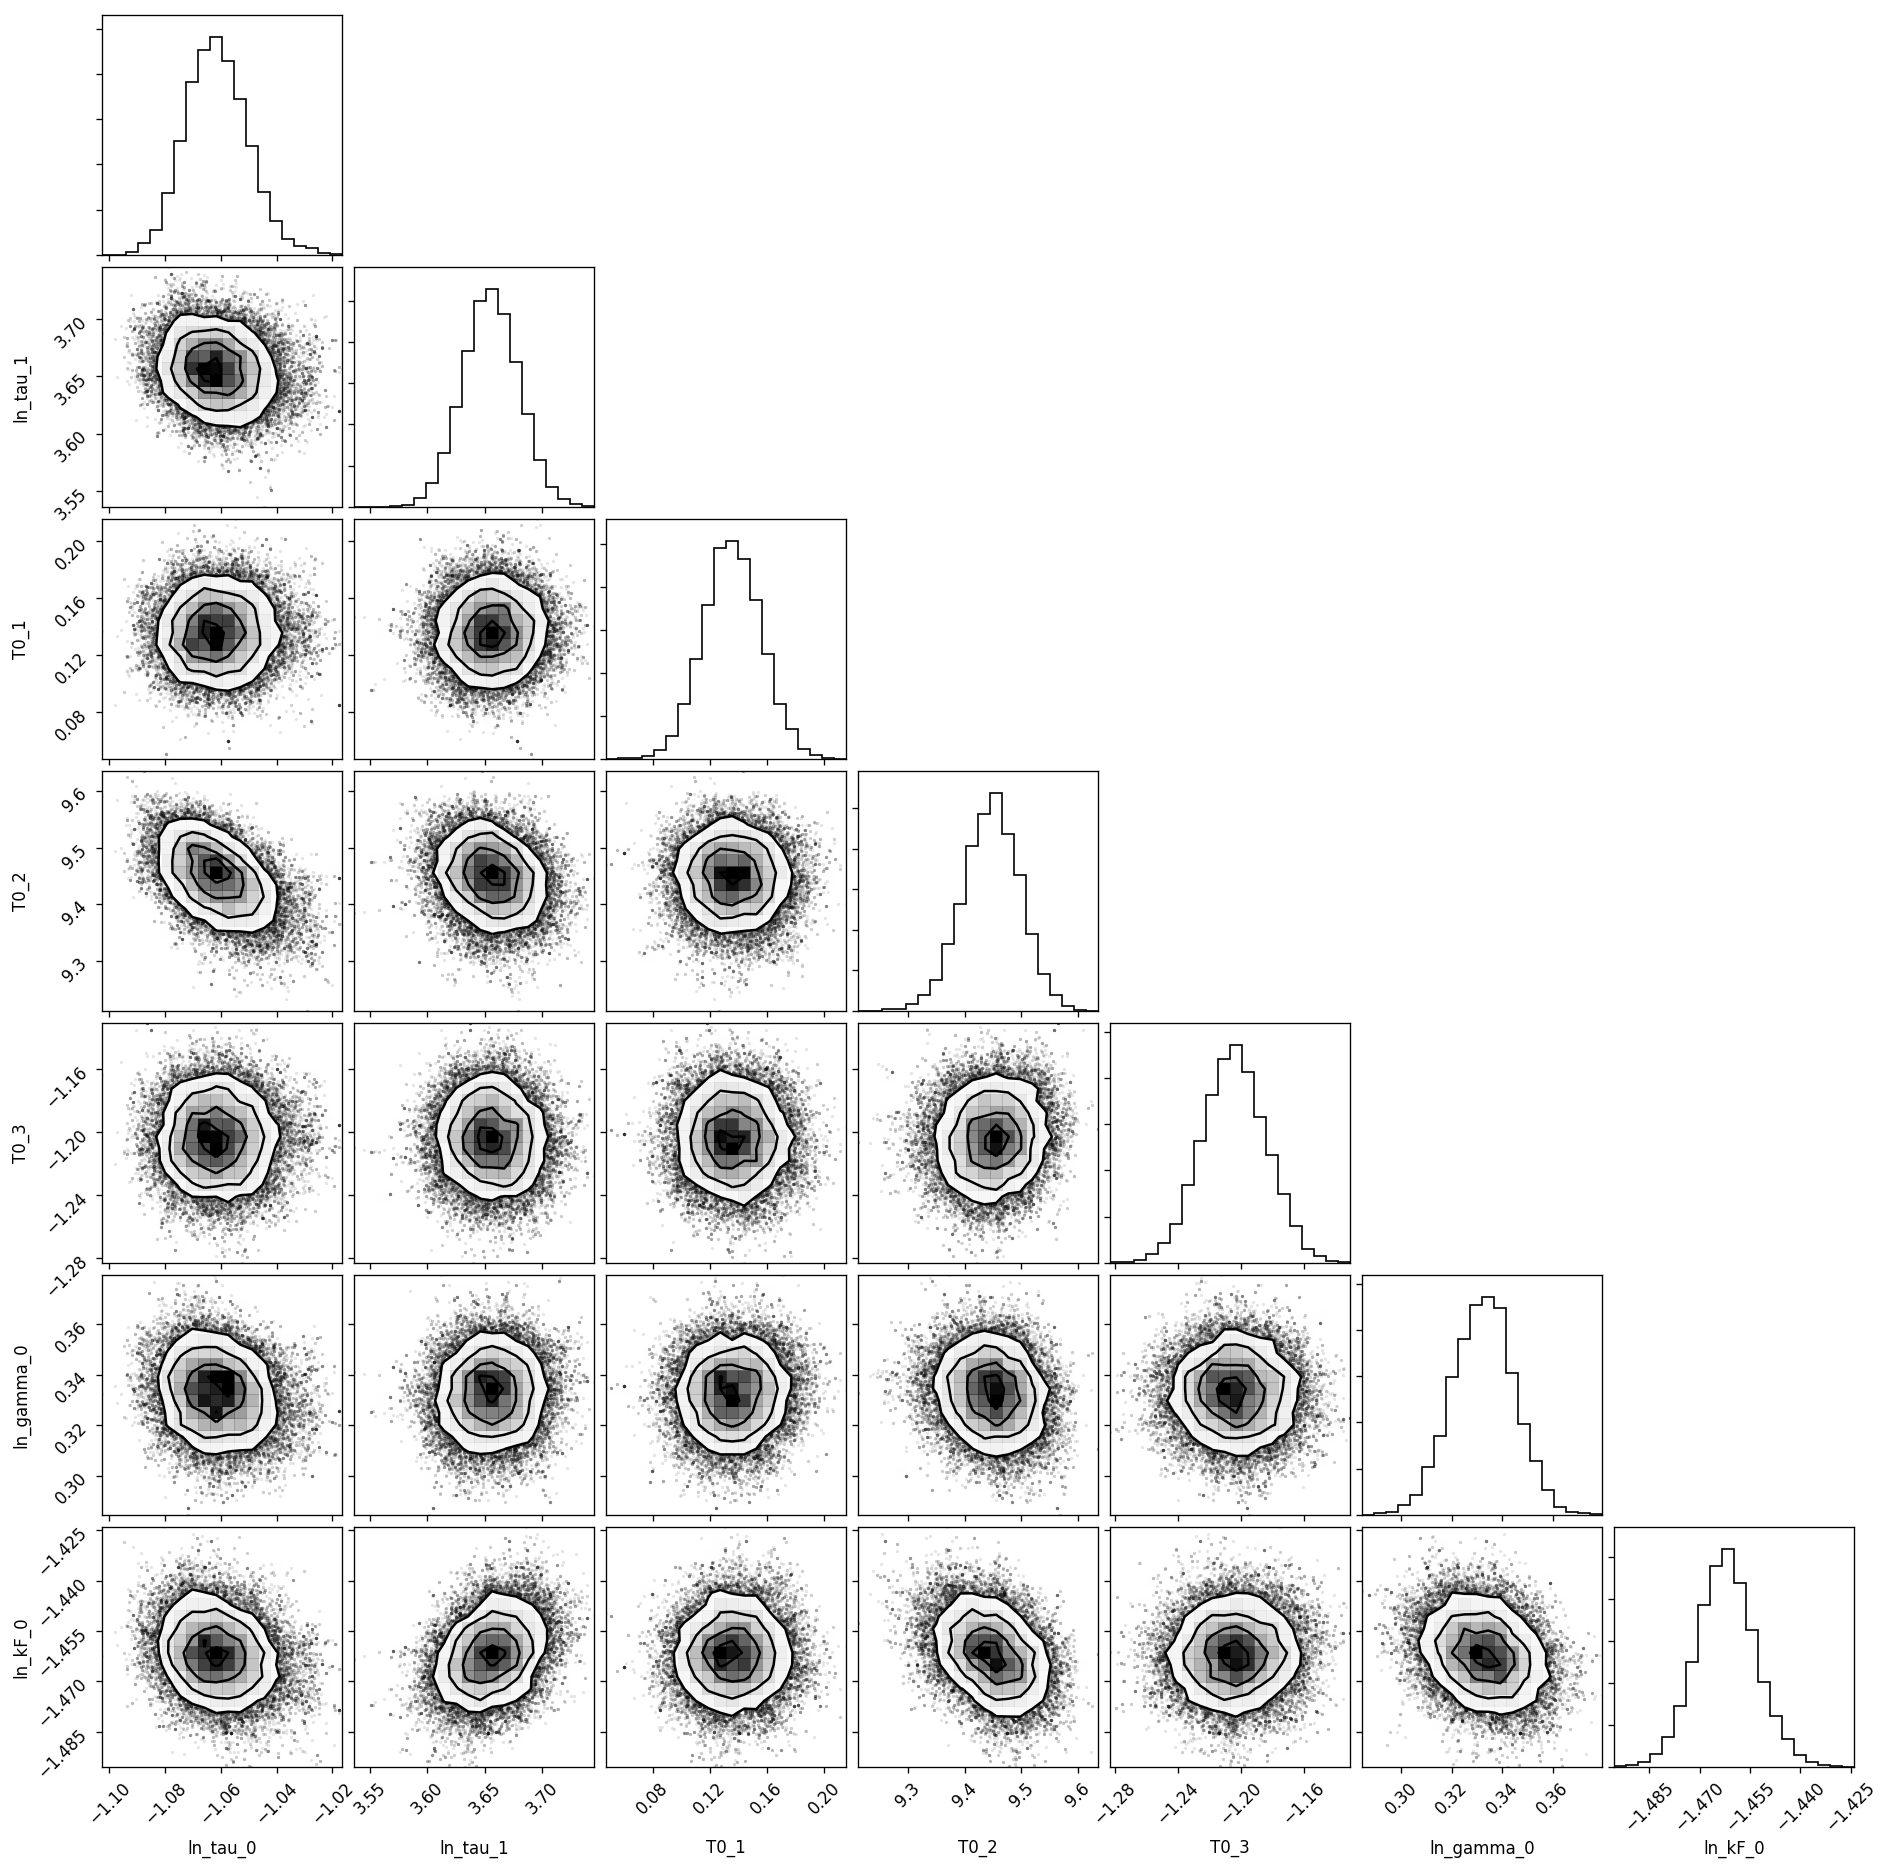

In [33]:
new_sampler.plot_corner(cube=False)

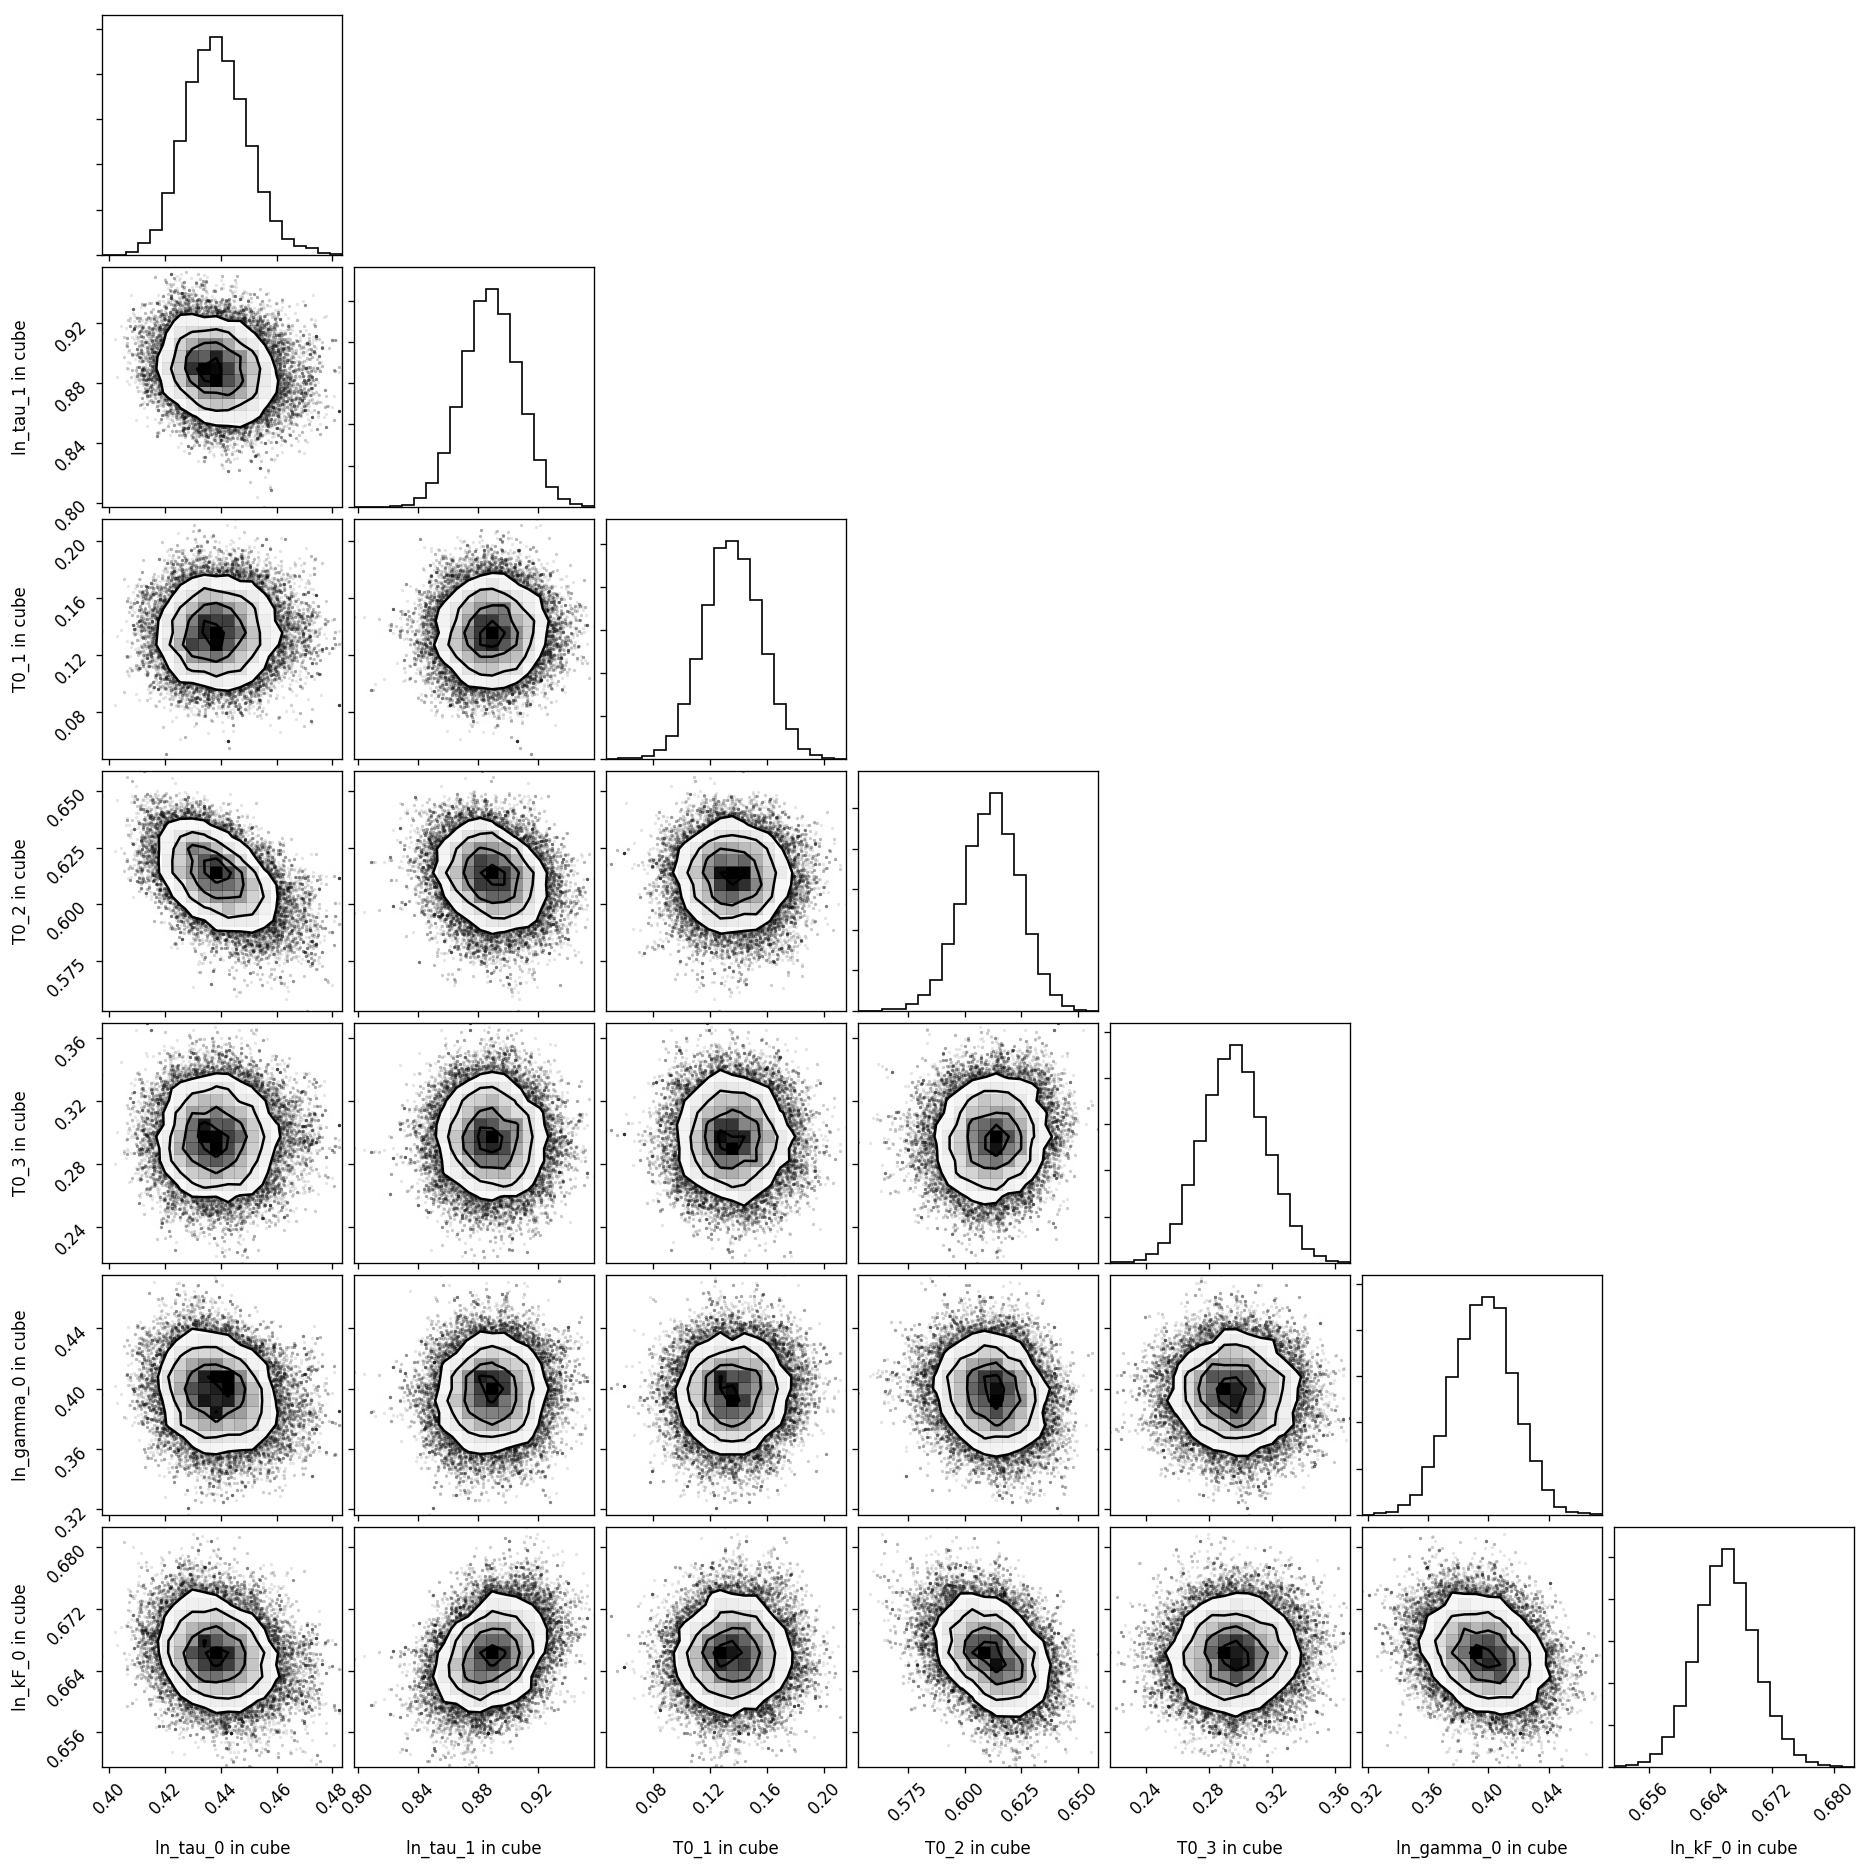

In [34]:
new_sampler.plot_corner(cube=True)

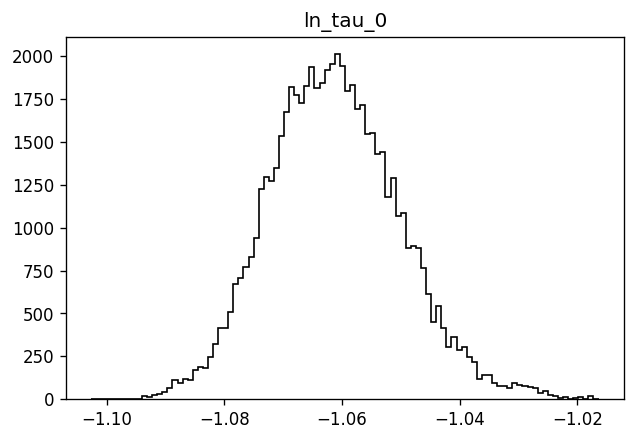

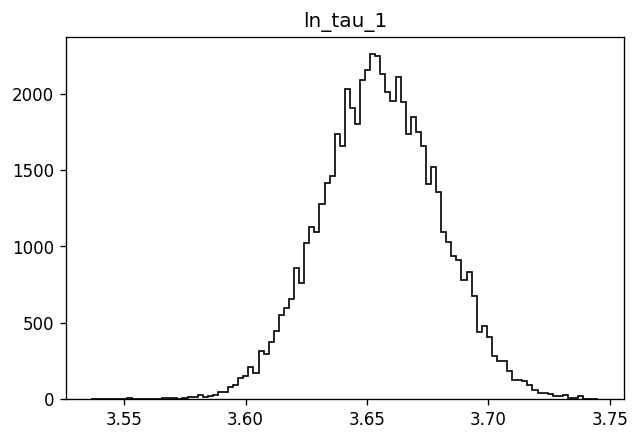

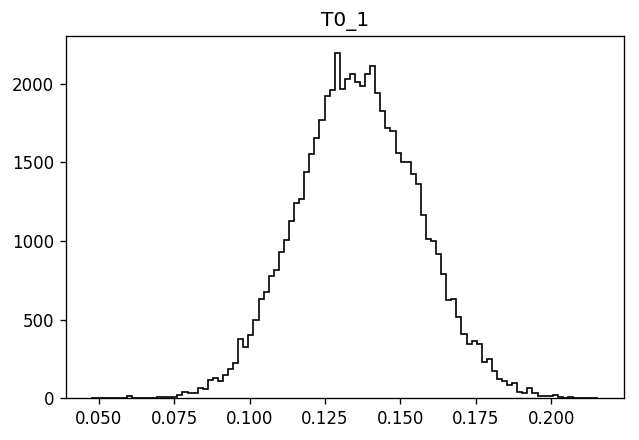

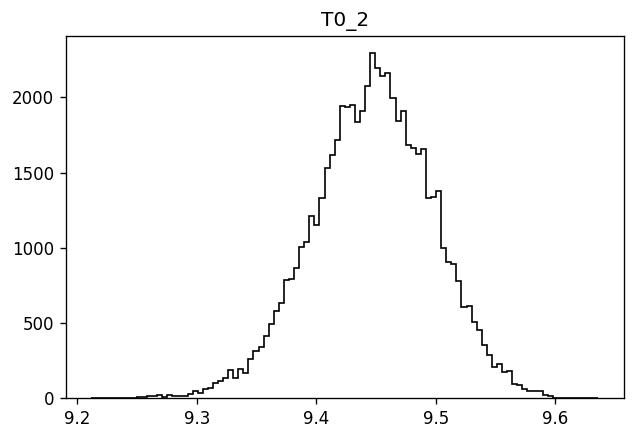

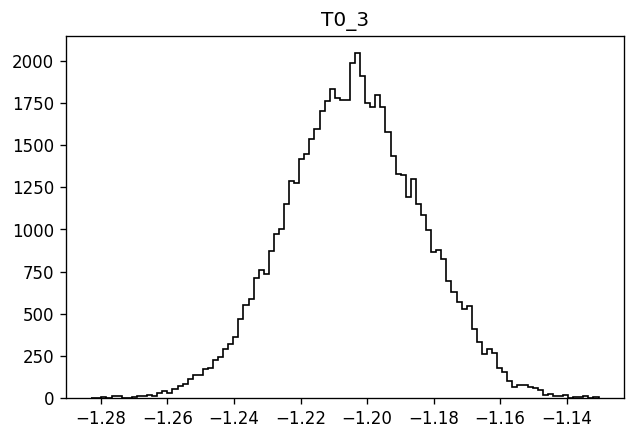

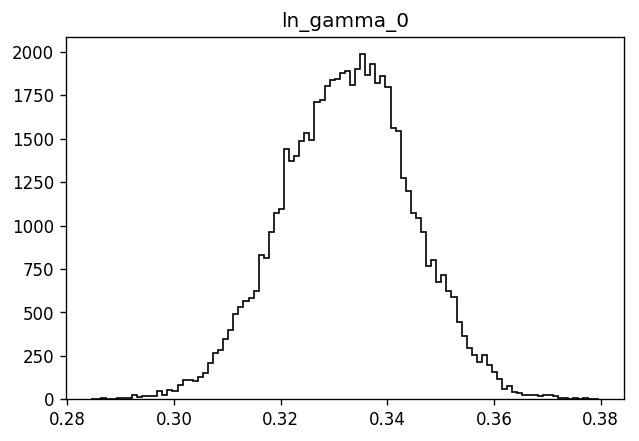

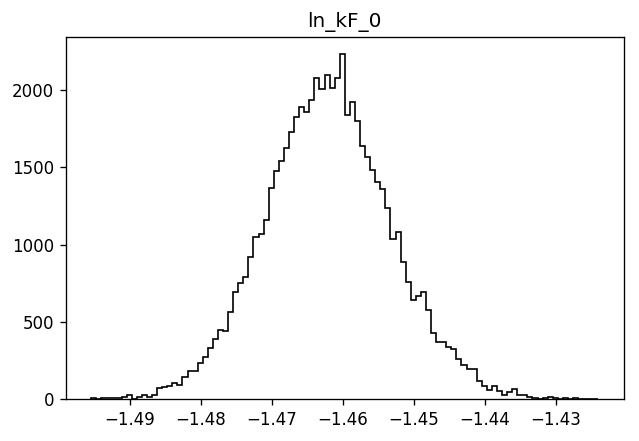

In [35]:
new_sampler.plot_histograms(cube=False)